In [1]:
from ema_workbench import load_results
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench.analysis import plotting, pairs_plotting
import pandas as pd
import os
import OFAT_weights as OFAT_w
import numpy as np

In [3]:
res = load_results("network_results/" + "network_data.tar.gz")
experiments, outcomes = res
output_folder = 'network_results_1/figures_1/'
plt.rcParams['axes.axisbelow'] = True

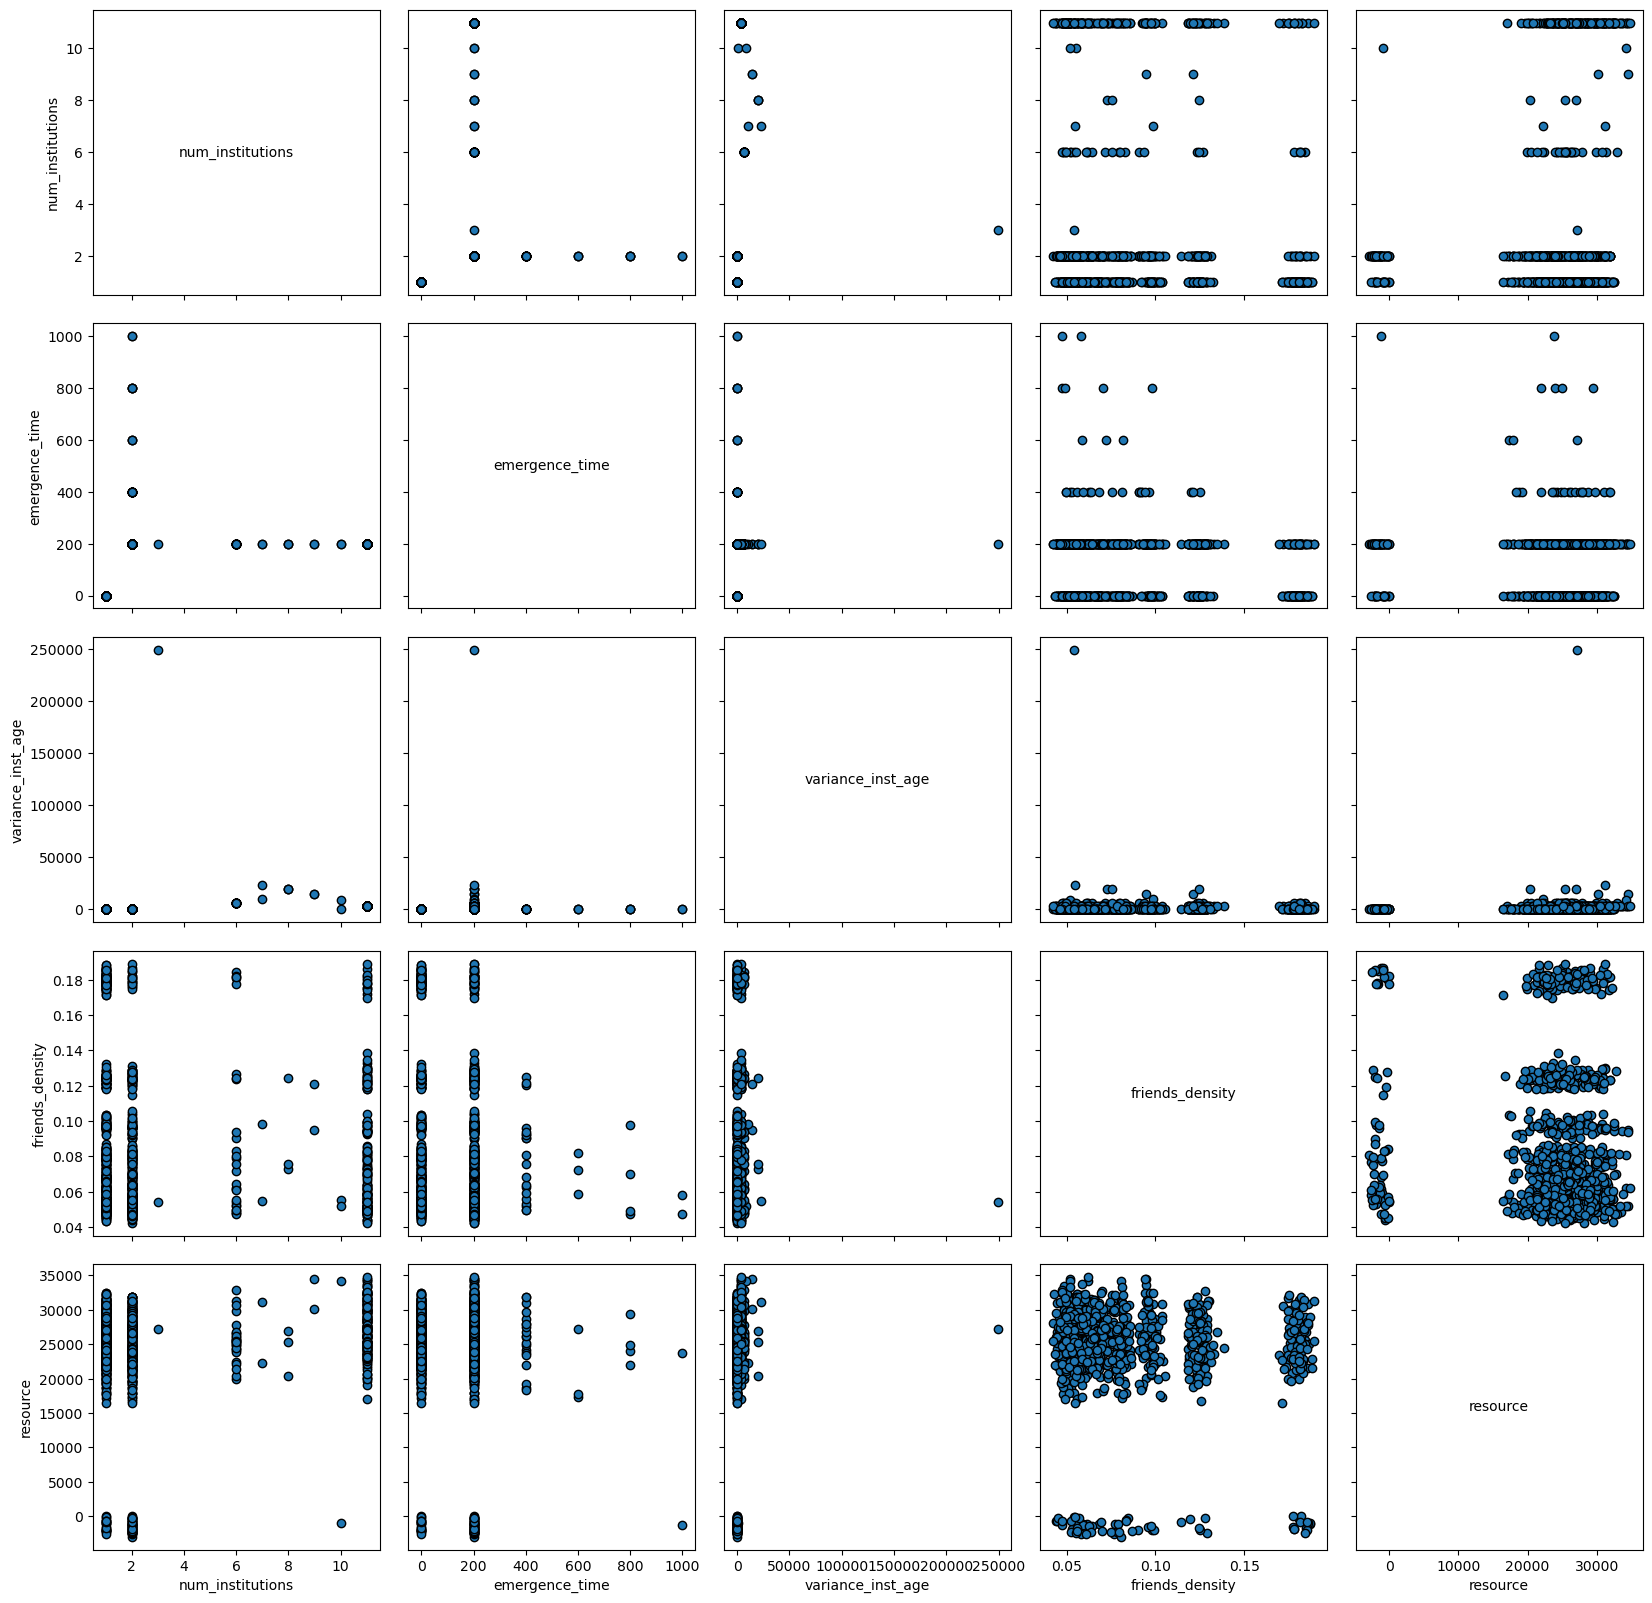

In [4]:
outcomes_list = ['num_institutions', 'emergence_time', 'variance_inst_age', 'friends_density', 'resource']
plt.rcParams['figure.figsize'] = [20, 20]
# plt.grid(visible=True)
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, outcomes_to_show=outcomes_list, legend=False)

# plt.savefig(os.path.join(output_folder, 'pairs_plot.png'))
plt.show()

In [6]:
file_path = "network_results_1/" + "network_data.csv"
data_frame = pd.read_csv(file_path)
outcome_names = [
    "num_institutions",
    "emergence_time",
    "mean_inst_age",
    "variance_inst_age",
    "agents_avg_consumption",
    "mean_in_degree",
    "variance_in_degree",
    "mean_out_degree",
    "variance_out_degree",
    "mean_comb_degree",
    "variance_comb_degree",
    "friends_density",
    "resource",
    "time_step"
]

plt.rcParams['figure.figsize'] = [6.4, 4.8]
plt.rcParams['axes.axisbelow'] = False

In [12]:
no_outliers = data_frame[data_frame["resource"] > 0]
print(no_outliers["time_step"].value_counts())
print("________")
print(data_frame["time_step"].value_counts())

2000    931
Name: time_step, dtype: int64
________
2000    931
241       3
258       3
246       3
249       3
235       2
265       2
325       2
274       2
263       2
131       2
108       1
407       1
221       1
399       1
178       1
234       1
215       1
463       1
247       1
218       1
229       1
245       1
644       1
150       1
85        1
253       1
494       1
377       1
76        1
268       1
647       1
321       1
93        1
436       1
296       1
256       1
250       1
144       1
315       1
210       1
79        1
276       1
270       1
228       1
310       1
264       1
302       1
244       1
237       1
279       1
113       1
501       1
376       1
392       1
227       1
Name: time_step, dtype: int64


In [ ]:
avg_df = data_frame.groupby('n_fragments').mean()
avg_df.index

In [ ]:

for outcome in outcome_names:
    plt.figure() # figsize=(10, 10))
    plt.grid(visible=True)
    plt.scatter(avg_df.index, avg_df[outcome])
    plt.xlabel('n_fragments')#, fontsize=16)
    plt.ylabel(outcome)#, fontsize=16)
    plt.title('average ' + outcome + ' vs. num_fragments')#, fontsize=18)
    plt.savefig(os.path.join(output_folder, outcome + '_avg_vs_num_fragments.png'))
    plt.close()  # Close the figure to release resources
    plt.show()

In [14]:
for outcome in outcome_names:
    sns.set_style('white')
    palette = 'Set2'
    ax = sns.violinplot(x="n_fragments", y=outcome, data=no_outliers, hue='n_fragments',
                        dodge=False, palette=palette,
                        scale="width", inner=None)
    # ax.set_ylim(0,)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    for violin in ax.collections:
        bbox = violin.get_paths()[0].get_extents()
        x0, y0, width, height = bbox.bounds
        violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

    sns.boxplot(x="n_fragments", y=outcome, data=no_outliers, saturation=1, showfliers=False,
            width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)
    old_len_collections = len(ax.collections)
    sns.stripplot(x="n_fragments", y=outcome, data=no_outliers, hue='n_fragments', palette=palette, dodge=False, ax=ax)
    for dots in ax.collections[old_len_collections:]:
        dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.legend_.remove()
    plt.savefig(os.path.join(output_folder, '_violin' + outcome + '_vs_num_fragments.png'))
    plt.close()  # Close the figure to release resources
    plt.show()
    plt.show()

C:\Users\Матвей\AppData\Local\Temp\ipykernel_8216\2575175584.py:20: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
C:\Users\Матвей\AppData\Local\Temp\ipykernel_8216\2575175584.py:20: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
C:\Users\Матвей\AppData\Local\Temp\ipykernel_8216\2575175584.py:20: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
C:\Users\Матвей\AppData\Local\Temp\ip

In [ ]:
sns.set_style('white')
palette = 'Set2'
ax = sns.violinplot(x="n_fragments", y=outcome, data=data_frame, hue="species", dodge=False,
                    palette=palette,
                    scale="width", inner=None)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

sns.boxplot(x="species", y="sepal_length", data=iris, saturation=1, showfliers=False,
            width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(x="species", y="sepal_length", data=iris, hue="species", palette=palette, dodge=False, ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.legend_.remove()
plt.show()

In [ ]:
# uncertainty = 'weight_attribute'
# # uncertainty = 'weight_traidic'
# uncertainty = 'weight_geo'
# outcomes = ['num_institutions',
#             "emergence_time",
#             "mean_inst_age",
#             "variance_inst_age",
#             "agents_avg_consumption",
#             "mean_in_degree",
#             "variance_in_degree",
#             "mean_comb_degree",
#             "variance_comb_degree",
#             "p_total_mean",
#             "p_total_variance",
#             # "p_attribute_mean",
#             # "p_attribute_variance"
#             "p_geo_mean",
#             "p_geo_variance"
#             # "p_triadic_mean",
#             # "p_triadic_variance"
#             ]

In [ ]:
# folder_path = 'OFAT_weight_results'
# data_frames = {}  # Dictionary to store DataFrames

In [ ]:
# file_path = os.path.join(folder_path, f"{uncertainty}.csv")
# if os.path.exists(file_path):
#     data_frames[uncertainty] = pd.read_csv(file_path)
# # outcomes_data_frames[uncertainty] = data_frames[uncertainty].drop(columns=['scenario', 'policy', 'model', 'seed'])
# # unique_values = outcomes_data_frames[uncertainty][uncertainty].unique()
# # column_names = outcomes_data_frames[uncertainty].columns.tolist()
# # df_avg = pd.DataFrame(columns=column_names)
# # avg_dict = {}
# # for value in unique_values:
# #     filtered_df = outcomes_data_frames[uncertainty][data_frames[uncertainty][uncertainty] == value]
# #     for column in column_names:
# #         avg_dict[column] = filtered_df[column].mean()
# #     df_avg = df_avg.append(avg_dict, ignore_index=True)
# # df_avg
# output_folder = 'OFAT_weight_results/figures/' + uncertainty
# os.makedirs(output_folder, exist_ok=True)
# for outcome in outcomes:
#     plt.figure()
#     plt.scatter(data_frames[uncertainty][uncertainty], data_frames[uncertainty][outcome])
#     plt.xlabel(uncertainty)
#     plt.ylabel(outcome)
#     plt.title(f'{outcome} vs. {uncertainty}')
#     plt.savefig(os.path.join(output_folder, f'{outcome}_vs_{uncertainty}.png'))
#     plt.close()  # Close the figure to release resources
#     plt.show()

In [ ]:
# uncertainty = "n_fragments"

# for outcome in outcomes:
#     plt.figure()
#     plt.scatter(df_avg[uncertainty], df_avg[outcome])
#     plt.xlabel(uncertainty)
#     plt.ylabel(outcome)
#     plt.title(f'{outcome} vs. {uncertainty}')
#     plt.show()

In [ ]:
# results = {}
# results['max_action'] = load_results('OFAT_results_1/max_action')
# results['n_actions'] = load_results('OFAT_results_1/n_actions')
# results['num_ticks'] = load_results('OFAT_results_1/num_ticks')
# results['weight_attribute'] = load_results('OFAT_results_1/weight_attribute')
# results['weight_triadic'] = load_results('OFAT_results_1/weight_triadic')



In [ ]:
# outcome_names = [
# "num_institutions",
# "agents_avg_consumption",
# "mean_in_degree",
# "variance_in_degree",
# "mean_comb_degree",
# "variance_comb_degree"]

In [ ]:
# # Your code to load results and define outcome_names

# output_folder = 'OFAT_results_1/figures'
# os.makedirs(output_folder, exist_ok=True)

# for parameter in results.keys():
#     experiments, outcomes = results[parameter]
#     for outcome in outcome_names:
#         plt.figure()
#         plt.scatter(experiments[parameter], outcomes[outcome])
#         plt.xlabel(parameter)
#         plt.ylabel(outcome)
#         plt.title(f'{outcome} vs. {parameter}')
#         plt.savefig(os.path.join(output_folder, f'{outcome}_vs_{parameter}.png'))
#         plt.close()  # Close the figure to release resources

# # Show all saved figures together
# plt.show()

In [ ]:
# data = {}
# for parameter in results.keys():
#     experiments, outcomes = results[parameter]
#     data[parameter] = pd.DataFrame(experiments)
#     for outcome_name in outcome_names:
#         data[parameter][outcome_name] = outcomes[outcome_name]
#     data[parameter][parameter] = experiments[parameter]

In [ ]:
# data['n_actions']

In [ ]:
# for outcome in outcome_names:
#     fig, ax = plt.subplots()
#     list_outcome = []
#     list_outcome.append(outcome)
#     plotting.lines(experiments, outcomes, list_outcome)
#     plt.xlabel("max_action")
#     plt.ylabel(outcome)
#     plt.title(f"{outcome} vs. max_action")
#     plt.show()